<a target="_blank" rel="noopener noreferrer" href="https://colab.research.google.com/github/epacuit/introduction-machine-learning/blob/main/classification/example-classifying-digits.ipynb">![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)</a>

(classifying-digits)=
# Example: Classifying Digits

This is in the initial example discussed in the book "Deep Learning with Python" by François Chollet.

The MNIST dataset is a set of handwritten digits. It has a training set of 60,000 examples, and a test set of 10,000 examples. The digits have been size-normalized and centered in a fixed-size image.


## Step 1: Load the data

In [1]:
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

`train_data` and `test_data`: lists of images of handwritten digits.

`train_labels` and `test_labels`: The label associated with an example is the digit 0-9.

In [2]:
digit_idx = 0
print(train_images[digit_idx])
print(train_labels[digit_idx])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

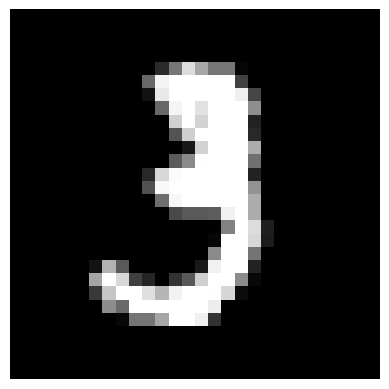

The label is 3


In [3]:
# display images
import matplotlib.pyplot as plt
import numpy as np

def display_image(image):
    plt.imshow(np.reshape(image, (28,28)), cmap='gray')
    plt.axis('off')
    plt.show()

digit_idx = 10
display_image(train_images[digit_idx])
print(f"The label is {train_labels[digit_idx]}")

## Step 2: Preprocess the data

We reshape the data into the shape that the network expects, and scale it so that all values are in the `[0, 1]` interval.

* Reshaping flattens images so they can be inputted to standard neural networks.
* Normalizing converts pixel values from `[0,255]` to `[0,1]` to aid neural network training.
* Converting to `float32` ensures the model works with precise fractional numbers.



In [4]:

train_images = train_images.reshape((60000, 28*28)) 
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28*28))
test_images = test_images.astype('float32') / 255

In [5]:

print(len(train_images[0]))

784


## Define the Model

`sparse_categorical_crossentropy` is a loss function used for multi-class classification problems when the labels are *integers* rather than *one-hot vectors*.

It's essentially identical to `categorical_crossentropy`, except it simplifies label handling by not requiring explicit one-hot encoding.


In [6]:
from tensorflow import keras 
from tensorflow.keras.layers import Dense

model = keras.Sequential([
    Dense(64, activation='relu'),
    Dense(256, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(
    optimizer='rmsprop', 
    loss = 'sparse_categorical_crossentropy', 
    metrics=["accuracy"])


2025-05-06 06:29:33.371405: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2 Max
2025-05-06 06:29:33.371424: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 96.00 GB
2025-05-06 06:29:33.371428: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 36.00 GB
I0000 00:00:1746527373.371439  611517 pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
I0000 00:00:1746527373.371457  611517 pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


## Step 4: Train the model


We will train the model for 20 epochs in mini-batches of 512 samples.

In [7]:
history = model.fit(train_images, train_labels, epochs=10, batch_size=128, verbose=0)


2025-05-06 06:29:33.645722: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


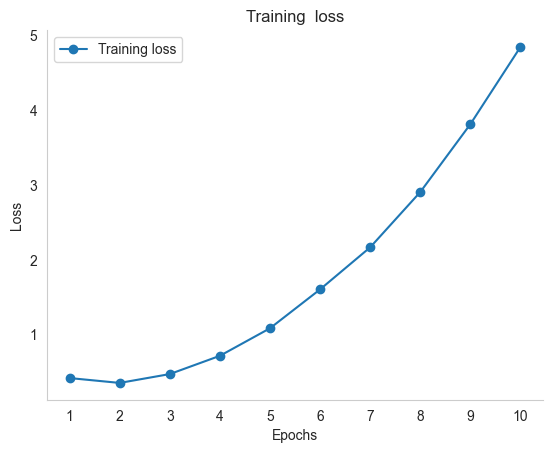

In [8]:
import matplotlib.pyplot as plt 
import seaborn as sns

sns.set_style("whitegrid")
history_dict = history.history

loss_values = history_dict["loss"]

epochs = range(1, len(loss_values) + 1) 
plt.plot(epochs, loss_values, "o-", label="Training loss") 
plt.title("Training  loss") 
plt.xticks(epochs)
plt.xlabel("Epochs") 
plt.ylabel("Loss") 
plt.legend() 
sns.despine()
plt.grid(False)
plt.show()

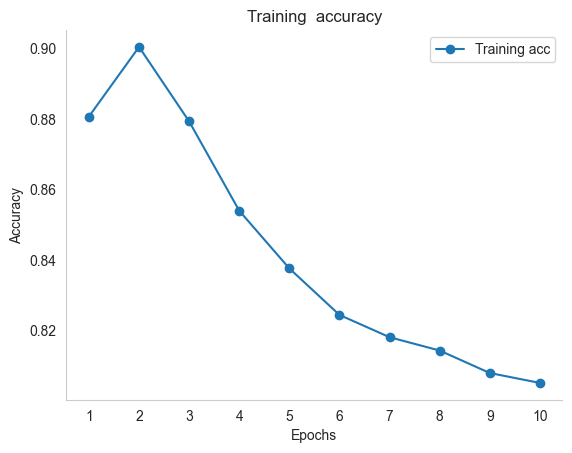

In [9]:
acc = history_dict["accuracy"]

epochs = range(1, len(loss_values) + 1) 
plt.plot(epochs, acc, "o-", label="Training acc")
plt.title("Training  accuracy") 
plt.xticks(epochs)
plt.xlabel("Epochs") 
plt.ylabel("Accuracy") 
plt.legend() 
sns.despine()
plt.grid(False)
plt.show()

In [10]:
results = model.evaluate(test_images, test_labels)

print(f"The test loss is {results[0]}")
print(f"The test accuracy is {results[1]}")
print("The predictions are:")   
predictions = model.predict(test_images)
print(predictions)

  1/313 ━━━━━━━━━━━━━━━━━━━━ 30s 97ms/step - accuracy: 0.9062 - loss: 2.1967

 13/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8494 - loss: 2.4032  

 27/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8444 - loss: 2.7054

 41/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8408 - loss: 2.9370

 55/313 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8358 - loss: 3.1657

 69/313 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8328 - loss: 3.3295

 84/313 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8304 - loss: 3.4889

 98/313 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8290 - loss: 3.5889

112/313 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8282 - loss: 3.6473

125/313 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8278 - loss: 3.6849

139/313 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8273 - loss: 3.7278

153/313 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8269 - loss: 3.7655

168/313 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8268 - loss: 3.7921

182/313 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8269 - loss: 3.7994

197/313 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8271 - loss: 3.8055

211/313 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8275 - loss: 3.8098

226/313 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8277 - loss: 3.8176

241/313 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8279 - loss: 3.8196

256/313 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8280 - loss: 3.8302

270/313 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8281 - loss: 3.8403

285/313 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8284 - loss: 3.8445

300/313 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8288 - loss: 3.8471

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8290 - loss: 3.8504

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8290 - loss: 3.8508


The test loss is 3.972184658050537
The test accuracy is 0.8314999938011169
The predictions are:


  1/313 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step

 44/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 

 96/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

149/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

202/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

255/313 ━━━━━━━━━━━━━━━━━━━━ 0s 995us/step

309/313 ━━━━━━━━━━━━━━━━━━━━ 0s 985us/step

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


[[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.00000000e+00
  5.68852683e-33 5.85545689e-26]
 [4.34990486e-37 0.00000000e+00 1.00000000e+00 ... 0.00000000e+00
  1.23652828e-36 0.00000000e+00]
 [0.00000000e+00 9.34600949e-01 6.53953776e-02 ... 1.51370124e-14
  3.64779999e-06 1.07504106e-17]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.03953448e-14
  1.56669330e-07 3.74645717e-03]
 [2.32753185e-34 0.00000000e+00 0.00000000e+00 ... 2.03812687e-17
  1.00000000e+00 1.07989966e-26]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]
